In [77]:
using CSV
using DataFrames
using Glob
using Statistics

In [78]:
using Gadfly
import Cairo, Fontconfig

In [79]:
ENV["COLUMNS"] = 1000;

In [80]:
defaultfont = "CMU Serif";
fontstyles = (
    key_title_font = defaultfont,
    key_label_font = defaultfont,
    minor_label_font = defaultfont,
    major_label_font = defaultfont,
    key_title_font_size = 14px,
    key_label_font_size = 12px,
    minor_label_font_size = 14px,
    major_label_font_size = 16px,
);

In [81]:
pointstyles = (
    highlight_width=0px,
);

In [82]:
fns = glob("*.csv", "../results/experiment_4_6b/real/");
results_list = [DataFrame(CSV.File(fn)) for fn in fns];
results_real = vcat(results_list...);

In [83]:
fns = glob("*.csv", "../results/experiment_4_6b/er/");
results_list = [DataFrame(CSV.File(fn)) for fn in fns];
results_er = vcat(results_list...);

In [84]:
results_real_130_131 = filter(row -> row.graphA_name == "A_enron_week130" && row.graphB_name == "A_enron_week131", results_real);
results_real_131_132 = filter(row -> row.graphA_name == "A_enron_week131" && row.graphB_name == "A_enron_week132", results_real);
results_real_130_132 = filter(row -> row.graphA_name == "A_enron_week130" && row.graphB_name == "A_enron_week132", results_real);

In [85]:
results_er_130_131 = filter(row -> row.graphA_name == "A_enron_week130" && row.graphB_name == "A_enron_week131", results_er);
results_er_131_132 = filter(row -> row.graphA_name == "A_enron_week131" && row.graphB_name == "A_enron_week132", results_er);
results_er_130_132 = filter(row -> row.graphA_name == "A_enron_week130" && row.graphB_name == "A_enron_week132", results_er);

In [86]:
mean(x) = sum(x) / length(x);
stderror(x) = std(x) / sqrt(length(x));

In [87]:
function avg_results(df)
    return combine(groupby(df, :m), [
        :alignment_strength_1 => mean => :alignment_strength_mean,
        :match_ratio => mean => :match_ratio_mean,
        :alignment_strength_1 => stderror => :alignment_strength_stderror,
        :match_ratio => stderror => :match_ratio_stderror,
    ]);
end;

In [88]:
results_real_130_131_avg = avg_results(results_real_130_131);
results_real_131_132_avg = avg_results(results_real_131_132);
results_real_130_132_avg = avg_results(results_real_130_132);

In [89]:
results_er_130_131_avg = avg_results(results_er_130_131);
results_er_131_132_avg = avg_results(results_er_131_132);
results_er_130_132_avg = avg_results(results_er_130_132);

In [90]:
figurespath = "./figures_46b/pdf/"
if !isdir(figurespath) mkpath(figurespath) end;

In [91]:
colors = Scale.default_discrete_colors(3)[[1,3]]
colors2 = Scale.default_discrete_colors(3)[[1,3]]

In [92]:
colors3 = Scale.default_discrete_colors(4)[[1,3,4]]

In [93]:
# colors4 = Scale.default_discrete_colors(5)[[1,3,4,5]]
colors4 = [colorant"deepskyblue", colorant"darkblue", colorant"palegreen1", colorant"darkgreen"]

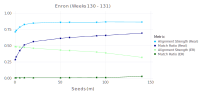

In [94]:
plt = plot(
    layer(
        results_real_130_131_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[1]),
    ),
    layer(
        results_real_130_131_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[2]),
    ),
    layer(
        results_er_130_131_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[3]),
    ),
    layer(
        results_er_130_131_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[4]),
    ),
    Guide.xlabel("Seeds (m)"),
    Guide.ylabel(""),
    Guide.title("Enron (Weeks 130 - 131)"),
    Coord.cartesian(ymin=0, ymax=1),
    Guide.manual_color_key("Metric", ["Alignment Strength (Real)", "Match Ratio (Real)", "Alignment Strength (ER)", "Match Ratio (ER)"], colors4),
    Guide.yticks(ticks=0:0.25:1),
    style(
        ;fontstyles...,
        pointstyles...,
    ),
)

plt |> PDF(joinpath(figurespath, "exp46_enron_130_131.pdf"), 20cm, 10cm)
plt |> SVG(20cm, 10cm)

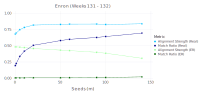

In [95]:
plt = plot(
    layer(
        results_real_131_132_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[1]),
    ),
    layer(
        results_real_131_132_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[2]),
    ),
        layer(
        results_er_131_132_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[3]),
    ),
    layer(
        results_er_131_132_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[4]),
    ),
    Guide.xlabel("Seeds (m)"),
    Guide.ylabel(""),
    Guide.title("Enron (Weeks 131 - 132)"),
    Coord.cartesian(ymin=0, ymax=1),
    Guide.manual_color_key("Metric", ["Alignment Strength (Real)", "Match Ratio (Real)", "Alignment Strength (ER)", "Match Ratio (ER)"], colors4),
    Guide.yticks(ticks=0:0.25:1),
    style(
        ;fontstyles...,
        pointstyles...,
    ),
)

plt |> PDF(joinpath(figurespath, "exp46_enron_131_132.pdf"), 20cm, 10cm)
plt |> SVG(20cm, 10cm)

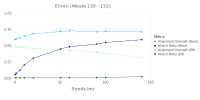

In [96]:
plt = plot(
    layer(
        results_real_130_132_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[1]),
    ),
    layer(
        results_real_130_132_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[2]),
    ),
    layer(
        results_er_130_132_avg,
        x=:m,
        y=:alignment_strength_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[3]),
    ),
    layer(
        results_er_130_132_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors4[4]),
    ),
    Guide.xlabel("Seeds (m)"),
    Guide.ylabel(""),
    Guide.title("Enron (Weeks 130 - 132)"),
    Coord.cartesian(ymin=0, ymax=1),
    Guide.manual_color_key("Metric", ["Alignment Strength (Real)", "Match Ratio (Real)", "Alignment Strength (ER)", "Match Ratio (ER)"], colors4),
    Guide.yticks(ticks=0:0.25:1),
    style(
        ;fontstyles...,
        pointstyles...,
    ),
)

plt |> PDF(joinpath(figurespath, "exp46_enron_130_132.pdf"), 20cm, 10cm)
plt |> SVG(20cm, 10cm)

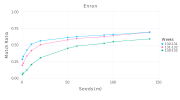

In [97]:
plt = plot(
    layer(
        results_real_130_131_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors3[1]),
    ),
    layer(
        results_real_131_132_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors3[2]),
    ),
    layer(
        results_real_130_132_avg,
        x=:m,
        y=:match_ratio_mean,
        Geom.point, Geom.line,
        style(default_color=colors3[3]),
    ),
    Guide.xlabel("Seeds (m)"),
    Guide.ylabel("Match Ratio"),
    Guide.title("Enron"),
    Coord.cartesian(ymin=0, ymax=1),
    Guide.manual_color_key("Weeks", ["130-131", "131-132", "130-132"], colors3),
    Guide.yticks(ticks=0:0.25:1),
    style(
        ;fontstyles...,
        pointstyles...,
    ),
)

plt |> PDF(joinpath(figurespath, "exp46_enron_130_131_132.pdf"), 18cm, 10cm)
plt |> SVG(18cm, 10cm)

In [98]:
results_real_130_131_avg |> CSV.write("figures_46b/results/exp46_enron_130_131.csv");
results_real_131_132_avg |> CSV.write("figures_46b/results/exp46_enron_131_132.csv");
results_real_130_132_avg |> CSV.write("figures_46b/results/exp46_enron_130_132.csv");